# Lab 3: Minimizing Cost

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

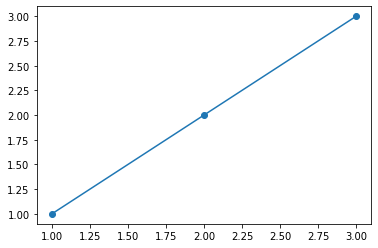

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

## Cost by W

$$ H(x) = Wx $$

In [5]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item())

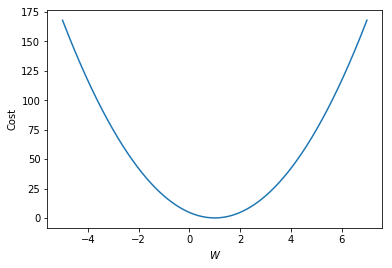

In [ ]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand

In [ ]:
W = 0

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

In [ ]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


$$ W := W - \alpha \nabla W $$

In [ ]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(1.4000)


Q1. 경사하강법(Gradient Descent) W:=W−α∇W에서 -를 쓰는 이유는?

=>

## Training

위의 내용을 참고해 코드를 완성시키세요.

In [10]:
import numpy as np
import torch
import torch.optim as optim
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = 0
#이 부분을 채워넣으세요.# #가중치 W를 0으로 초기화하세요. Gradient Descent by Hand이기 때문에 학습을 통해 값이 변경되는 것이 아닙니다!
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    #이 부분을 채워넣으세요.# # H(x)=Wx를 이용하세요.
    
    # cost gradient 계산
    cost = torch.mean((x_train * W - y_train)**2)
    #이 부분을 채워넣으세요.# #파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언하세요.
    gradient = torch.sum((W * x_train - y_train) * x_train)
    #이 부분을 채워넣으세요.# #Gradient Descent by Hand를 이용하세요.
    '''
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))
    '''
    print("Epoch :", epoch, 'Cost :',cost.item())
    # cost gradient로 H(x) 개선
    W -= lr* gradient
    #이 부분을 채워넣으세요.# #W:=W−α∇W을 이용하세요.

print('cost가 이상하게 변해요')

Epoch : 0 Cost : 4.666666507720947
Epoch : 1 Cost : 0.7466664910316467
Epoch : 2 Cost : 0.11946665495634079
Epoch : 3 Cost : 0.0191146582365036
Epoch : 4 Cost : 0.00305833644233644
Epoch : 5 Cost : 0.0004893290461041033
Epoch : 6 Cost : 7.829209789633751e-05
Epoch : 7 Cost : 1.2527179023891222e-05
Epoch : 8 Cost : 2.0041973129991675e-06
Epoch : 9 Cost : 3.206215808404522e-07
Epoch : 10 Cost : 5.128529423359396e-08
cost가 이상하게 변해요


## Training with `optim`

위의 내용을 참고해 코드를 완성시키세요.

In [24]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
model = LinearRegressionModel()
W = torch.zeros(1,requires_grad = True)#이 부분을 채워넣으세요.# #가중치 W를 0으로 초기화하고 학습을 통해 값이 변경될 수 있도록 하세요.
# optimizer 설정
optimizer = optim.SGD(model.parameters() ,lr=0.15) #이 부분을 채워넣으세요.# #SGD optimizer를 사용하고 learning rate는 0.15로 적용하세요.

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train*W#이 부분을 채워넣으세요.# # H(x)=Wx를 이용하세요.
    
    # cost 계산
    cost = F.mse_loss(hypothesis,y_train)#이 부분을 채워넣으세요.# #파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언하세요.

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # cost로 H(x) 개선
    #이 부분을 채워넣으세요.#  # gradient를 0으로 초기화
    #이 부분을 채워넣으세요.#  # 비용 함수를 미분하여 gradient 계산
    #이 부분을 채워넣으세요.#  # W와 b를 업데이트

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 0.000 Cost: 4.666667
Epoch    2/10 W: 0.000 Cost: 4.666667
Epoch    3/10 W: 0.000 Cost: 4.666667
Epoch    4/10 W: 0.000 Cost: 4.666667
Epoch    5/10 W: 0.000 Cost: 4.666667
Epoch    6/10 W: 0.000 Cost: 4.666667
Epoch    7/10 W: 0.000 Cost: 4.666667
Epoch    8/10 W: 0.000 Cost: 4.666667
Epoch    9/10 W: 0.000 Cost: 4.666667
Epoch   10/10 W: 0.000 Cost: 4.666667


In [18]:
print(dir(F))

['BroadcastingList1', 'BroadcastingList2', 'BroadcastingList3', 'Callable', 'GRID_SAMPLE_INTERPOLATION_MODES', 'GRID_SAMPLE_PADDING_MODES', 'List', 'Optional', 'Tensor', 'Tuple', '_Reduction', '_VF', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_adaptive_max_pool1d', '_adaptive_max_pool2d', '_adaptive_max_pool3d', '_add_docstr', '_fractional_max_pool2d', '_fractional_max_pool3d', '_get_softmax_dim', '_in_projection', '_in_projection_packed', '_infer_size', '_list_with_default', '_max_pool1d', '_max_pool2d', '_max_pool3d', '_no_grad_embedding_renorm_', '_overload', '_pad', '_pad_circular', '_pair', '_scaled_dot_product_attention', '_single', '_threshold', '_triple', '_unpool_output_size', '_verify_batch_size', '_verify_spatial_size', 'adaptive_avg_pool1d', 'adaptive_avg_pool2d', 'adaptive_avg_pool3d', 'adaptive_max_pool1d', 'adaptive_max_pool1d_with_indices', 'adaptive_max_pool2d', 'adaptive_max_pool2d_with_indices', 'adaptiv